In [ ]:
!pip install -U pyYAML
!pip install pycm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 5.1 MB/s 
  Attempting uninstall: pyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 66 kB 2.9 MB/s 
     |████████████████████████████████| 590 kB 15.2 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocessing_input
from pycm import *

In [ ]:
cfg = yaml.full_load(open("/content/drive/MyDrive/FP/config.yml", 'r'))

In [ ]:
xception = load_model(cfg['PATHS']['XCEPTION'])
resnet = load_model(cfg['PATHS']['RESNET'])
vgg = load_model(cfg['PATHS']['VGG'])

In [ ]:
test_data = pd.read_csv(cfg['PATHS']['TEST_SET'])

test_data_gen_res_vgg = ImageDataGenerator(preprocessing_function=resnet_preprocessing_input)
test_generator_res_vgg = test_data_gen_res_vgg.flow_from_dataframe(
    test_data,
    x_col='filename',
    y_col='category_str',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=128,
    shuffle = False,
    seed=42
)

test_data_gen_xception = ImageDataGenerator(rescale=1./255)
test_generator_xception = test_data_gen_xception.flow_from_dataframe(
    test_data,
    x_col='filename',
    y_col='category_str',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=128,
    shuffle = False,
    seed=42
)

Found 733 validated image filenames belonging to 3 classes.
Found 733 validated image filenames belonging to 3 classes.


In [ ]:
xception_accuracy = xception.evaluate_generator(test_generator_xception)[1]
print("xception model accuracy : " + str(xception_accuracy))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


xception model accuracy : 0.9276943802833557


In [ ]:
resnet_accuracy = resnet.evaluate_generator(test_generator_res_vgg)[1]
print("resnet model accuracy : " + str(resnet_accuracy))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


resnet model accuracy : 0.9645293354988098


In [ ]:
vgg_accuracy = vgg.evaluate_generator(test_generator_res_vgg)[1]
print("vgg model accuracy : " + str(vgg_accuracy))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


vgg model accuracy : 0.9549795389175415


In [ ]:
val = {
    'Model': ['Xception', 'Resnet', 'VGG'],
    'F1 Score': [0.92, 0.96, 0.88],
    'Recall' : [0.93, 0.98, 0.94],
    'Accuracy': [xception_accuracy, resnet_accuracy, vgg_accuracy]
}
df = pd.DataFrame(val)
df

,Model,F1 Score,Recall,Accuracy
0,Xception,0.92,0.93,0.927694
1,Resnet,0.96,0.98,0.964529
2,VGG,0.88,0.94,0.954980


In [ ]:
graphs_filepath = cfg['PATHS']['GRAPHS']

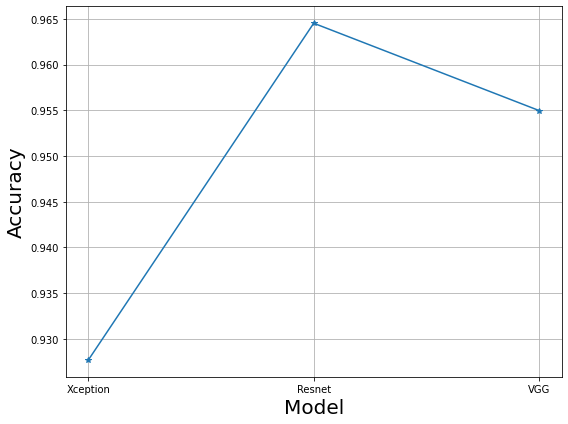

In [ ]:
plt.figure(figsize = (8 , 6 ))
plt.grid(True)
plt.plot(df.Model, df['Accuracy'], marker = "*")
plt.xlabel("Model" , color = "black" ,  fontsize = 20)
plt.ylabel("Accuracy" , color = "black" ,  fontsize = 20)
plt.tight_layout()
plt.savefig(graphs_filepath + 'accuracy.png')
plt.show()

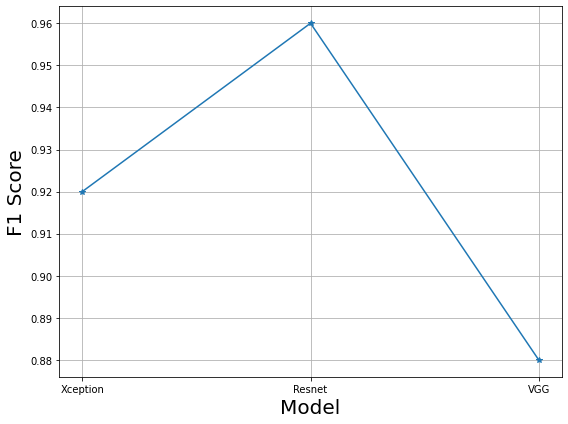

In [ ]:
plt.figure(figsize = (8 , 6 ))
plt.grid(True)
plt.plot(df.Model, df['F1 Score'], marker = "*")
plt.xlabel("Model" , color = "black" ,  fontsize = 20)
plt.ylabel("F1 Score" , color = "black" ,  fontsize = 20)
plt.tight_layout()
plt.savefig(graphs_filepath + 'f1score.png')
plt.show()

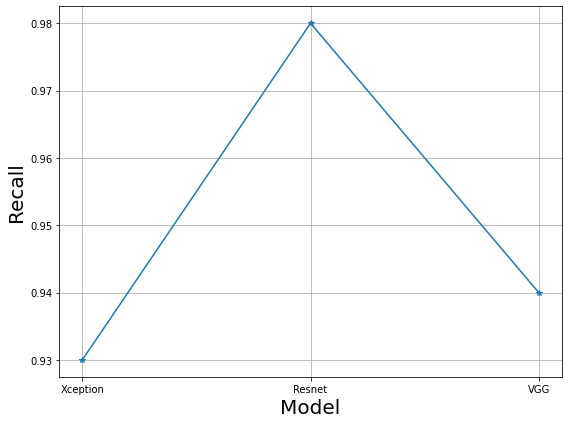

In [ ]:
plt.figure(figsize = (8 , 6 ))
plt.grid(True)
plt.plot(df.Model, df['Recall'], marker = "*")
plt.xlabel("Model" , color = "black" ,  fontsize = 20)
plt.ylabel("Recall" , color = "black" ,  fontsize = 20)
plt.tight_layout()
plt.savefig(graphs_filepath + 'recall.png')
plt.show()